In [1]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

In [2]:
# Setup the figures
execfile('../code/figure-setup.py')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [7]:
# Upload the fitting results for the C12 model with beta fixed at 2.0
bat_c12 = pd.read_csv('../data/bat-agn-c12-params.csv', index_col=0)

# Add in quadrature an uncertainty of 0.15 for f_AGN and 0.2 dex for the luminosities
bat_c12['agn_frac_err_high'] = np.sqrt(bat_c12['agn_frac_err_high']**2 + 0.15**2)
bat_c12['agn_frac_err_low'] = np.sqrt(bat_c12['agn_frac_err_low']**2 + 0.15**2)
bat_c12['lir_sf_err_high'] = np.sqrt(bat_c12['lir_sf_err_high']**2 + 0.2**2)
bat_c12['lir_sf_err_low'] = np.sqrt(bat_c12['lir_sf_err_low']**2 + 0.2**2)
bat_c12['lir_agn_err_high'] = np.sqrt(bat_c12['lir_agn_err_high']**2 + 0.2**2)
bat_c12['lir_agn_err_low'] = np.sqrt(bat_c12['lir_agn_err_low']**2 + 0.2**2)

In [8]:
# Upload the results for the undetected sources using upper limits as detections
undetected_test = pd.read_csv(casey_dir+'beta_fixed_2_wturn_gaussianPrior/test_undetected_noUL.csv', index_col=0)

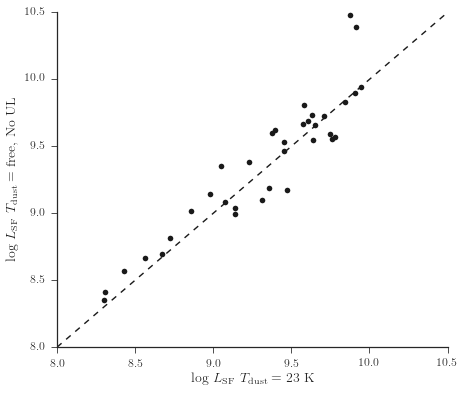

In [23]:
# Compare the upper limits on the SF luminosities
undetected_test['lir_sf_final'] = bat_c12['lir_sf']

fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)

ax1.plot(undetected_test['lir_sf_final'], undetected_test['lir_sf'], 'ko')
ax1.plot(np.arange(8.0, 10.5, 0.001), np.arange(8.0, 10.5, 0.001), 'k--')
ax1.set_xlabel(r'$\log\,L_{\rm SF}$ $T_{\rm dust}=23$ K', fontsize=14)
ax1.set_ylabel(r'$\log\,L_{\rm SF}$ $T_{\rm dust}=\rm{free}$, No UL', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
sn.despine()

fig.savefig(figsave_dir+'test_undetected_lsf.eps', bbox_inches='tight')

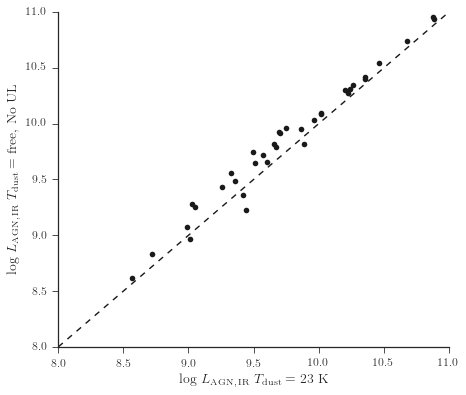

In [24]:
# Compare the upper limits on the AGN luminosities
undetected_test['lir_agn_final'] = bat_c12['lir_agn']

fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)

ax1.plot(undetected_test['lir_agn_final'], undetected_test['lir_agn'], 'ko')
ax1.plot(np.arange(8.0, 11.0, 0.001), np.arange(8.0, 11.0, 0.001), 'k--')
ax1.set_xlabel(r'$\log\,L_{\rm AGN,\,IR}$ $T_{\rm dust}=23$ K', fontsize=14)
ax1.set_ylabel(r'$\log\,L_{\rm AGN,\,IR}$ $T_{\rm dust}=\rm{free}$, No UL', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
sn.despine()

fig.savefig(figsave_dir+'test_undetected_lagn.eps', bbox_inches='tight')

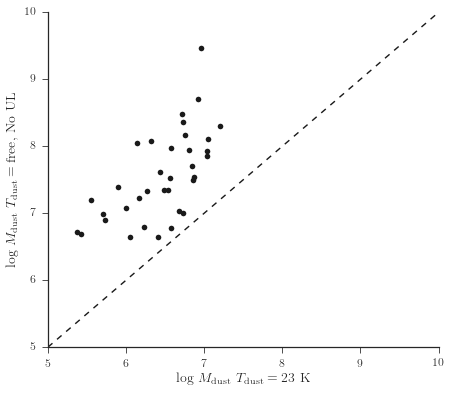

In [25]:
# Compare the upper limits on the AGN luminosities
undetected_test['mdust_final'] = bat_c12['mdust']

fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)

ax1.plot(undetected_test['mdust_final'], undetected_test['mdust'], 'ko')
ax1.plot(np.arange(5.0, 10.0, 0.001), np.arange(5.0, 10.0, 0.001), 'k--')
ax1.set_xlabel(r'$\log\,M_{\rm dust}$ $T_{\rm dust}=23$ K', fontsize=14)
ax1.set_ylabel(r'$\log\,M_{\rm dust}$ $T_{\rm dust}=\rm{free}$, No UL', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
sn.despine()

fig.savefig(figsave_dir+'test_undetected_mdust.eps', bbox_inches='tight')

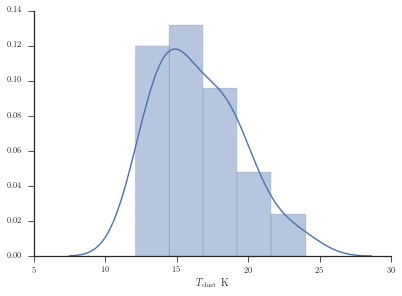

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
sn.distplot(undetected_test['tdust'])
sn.despine()
ax.set_xlabel(r'$T_{\rm dust}$ K')

fig.savefig(figsave_dir+'test_undetected_tdust_dist.eps', bbox_inches='tight')